In [60]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7f46e252-e1a0-4b1b-8434-18ff72273baf',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)

  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

In [57]:
type(data)

dict

In [58]:
import pandas as pd

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [63]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11132,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19715715.00000,19715715.00000,False,NaN,1,NaN,NaN,None,2024-06-23T19:48:00.000Z,64076.68601,9008057129.44183,-19.49510,-0.02654,-0.25545,-3.64327,-7.01669,-0.38996,-9.58138,1263317679534.49487,54.18760,1345610406227.94995,None,2024-06-23T19:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-23 15:51:11.309456
1,1027,Ethereum,ETH,ethereum,9079,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122275958.39094,122275958.39094,True,NaN,2,NaN,NaN,None,2024-06-23T19:48:00.000Z,3475.34988,7764389661.02834,-4.22890,-0.00229,-0.36651,-3.21125,-6.86624,10.63913,-4.36337,424951737323.18304,18.22710,424951737323.17999,None,2024-06-23T19:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-23 15:51:11.309456
2,825,Tether USDt,USDT,tether,89329,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112941691562.69630,116079124154.24519,True,NaN,3,NaN,NaN,None,2024-06-23T19:48:00.000Z,0.99939,25588965032.33218,-11.48190,-0.01269,-0.02283,0.00414,-0.04941,0.00761,-0.10391,112872674151.74617,4.84130,116008189493.14999,None,2024-06-23T19:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-23 15:51:11.309456
3,1839,BNB,BNB,bnb,2186,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147565925.11910,147565925.11910,False,NaN,4,NaN,NaN,None,2024-06-23T19:48:00.000Z,584.61297,1411965439.18384,1.55770,-0.07119,-0.39741,-3.91119,-2.74747,-2.87924,-1.71705,86268954444.35748,3.70070,86268954444.36000,None,2024-06-23T19:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-23 15:51:11.309456
4,5426,Solana,SOL,solana,690,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462142306.89536,578775254.05039,True,NaN,5,NaN,NaN,None,2024-06-23T19:48:00.000Z,131.42075,834502186.31795,-28.50590,-0.26838,-2.07399,-11.45904,-21.69119,-12.11237,-31.71419,60735088456.87640,2.60510,76063077815.89999,None,2024-06-23T19:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-23 15:51:11.309456
5,3408,USDC,USDC,usd-coin,19851,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32742241031.61628,32742241031.61628,False,NaN,6,NaN,NaN,None,2024-06-23T19:48:00.000Z,1.00002,2160113031.57112,-21.08780,-0.02204,0.00142,-0.00793,-0.00999,0.00665,0.00283,32742831182.42628,1.40440,32742831182.43000,None,2024-06-23T19:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-23 15:51:11.309456
6,52,XRP,XRP,xrp,1342,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55618185850.00000,99987512072.00000,False,NaN,7,NaN,NaN,None,2024-06-23T19:49:00.000Z,0.48170,431801431.03892,-17.12020,-0.14517,-1.10679,-1.58214,-9.56431,-10.07610,-26.62352,26791438392.75578,1.14910,48170284563.06000,None,2024-06-23T19:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-23 15:51:11.309456
7,11419,Toncoin,TON,toncoin,430,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2458257272.86139,5108008554.74434,True,NaN,8,3414166606.00000,26297558140.01899,None,2024-06-23T19:48:00.000Z,7.70248,271551658.78057,67.60940,0.42451,5.98209,-4.30235,22.46779,37.04957,40.99418,18934683340.46408,0.81210,39344345912.13000,Non

In [38]:
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

# Initialize the global dataframe
df = pd.DataFrame()

def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '10',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '7f46e252-e1a0-4b1b-8434-18ff72273baf',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        
        # Normalizing the JSON data and adding a timestamp
        df2 = pd.json_normalize(data['data'])
        df2['timestamp'] = pd.Timestamp.now()

        if df.empty:
            # Initialize df with df2
           df = df2
        else:
            # Ensure the new data has the same columns as the existing dataframe
            missing_cols_in_df2 = set(df.columns) - set(df2.columns)
            for col in missing_cols_in_df2:
               df2[col] = None
            missing_cols_in_df = set(df2.columns) - set(df.columns)
            for col in missing_cols_in_df:
               df[col] = None
            
            df = pd.concat([df, df2], ignore_index=True)
                
        #print(df)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

# Use this if you want to create a csv and append data to it
        #df = pd.json_normalize(data['data'])
        #df['timestamp'] = pd.to_datetime('now')
        #df

        #if not os.path.isfile(r'/Users/ramanjeetkaur/Documents/Data Analytics/Pandas/API.csv'):
            #df.to_csv(r'/Users/ramanjeetkaur/Documents/Data Analytics/Pandas/API.csv', header='column_names')
        #else:
            #df.to_csv(r'/Users/ramanjeetkaur/Documents/Data Analytics/Pandas/API.csv', mode='a', header=False)
    #except (ConnectionError, Timeout, TooManyRedirects) as e:
        #print(e)

# Run the function
api_runner()


In [36]:
import os
from time import sleep
from time import time

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60)
exit()


API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [13]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)
df

In [15]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d']].mean()		

In [16]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d
name,,,,,
Bitcoin,0.03286,-0.26720,-3.61470,-7.32391,0.06510
Ethereum,0.05224,-0.35632,-3.29108,-7.18036,10.97176
Tether USDt,-0.00383,-0.02131,0.03110,-0.12767,0.00837
BNB,0.02320,-0.38655,-3.87461,-2.80520,-3.13639
Solana,-0.24015,-2.26776,-11.63129,-21.90277,-12.27508
USDC,-0.00175,0.00180,0.00874,-0.06989,-0.00289
XRP,-0.04434,-1.15428,-1.52466,-9.59121,-10.24886
Toncoin,0.53072,6.23570,-4.30992,22.34938,37.32502
Dogecoin,0.47347,-0.73439,-9.43023,-25.55237,-19.64939


In [39]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.03286
             quote.USD.percent_change_24h    -0.26720
             quote.USD.percent_change_7d     -3.61470
             quote.USD.percent_change_30d    -7.32391
             quote.USD.percent_change_60d     0.06510
Ethereum     quote.USD.percent_change_1h      0.05224
             quote.USD.percent_change_24h    -0.35632
             quote.USD.percent_change_7d     -3.29108
             quote.USD.percent_change_30d    -7.18036
             quote.USD.percent_change_60d    10.97176
Tether USDt  quote.USD.percent_change_1h     -0.00383
             quote.USD.percent_change_24h    -0.02131
             quote.USD.percent_change_7d      0.03110
             quote.USD.percent_change_30d    -0.12767
             quote.USD.percent_change_60d     0.00837
BNB          quote.USD.percent_change_1h      0.02320
             quote.USD.percent_change_24h    -0.38655
             quote.USD.percent_change_7d

In [18]:
df5=df4.to_frame('values')
df

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.03286
            quote.USD.percent_change_24h  -0.26720
            quote.USD.percent_change_7d   -3.61470
            quote.USD.percent_change_30d  -7.32391
            quote.USD.percent_change_60d   0.06510
Ethereum    quote.USD.percent_change_1h    0.05224
            quote.USD.percent_change_24h  -0.35632
            quote.USD.percent_change_7d   -3.29108
            quote.USD.percent_change_30d  -7.18036
            quote.USD.percent_change_60d  10.97176
Tether USDt quote.USD.percent_change_1h   -0.00383
            quote.USD.percent_change_24h  -0.02131
            quote.USD.percent_change_7d    0.03110
            quote.USD.percent_change_30d  -0.12767
            quote.USD.percent_change_60d   0.00837
BNB         quote.USD.percent_change_1h    0.02320
            quote.USD.percent_change_24h  -0.38655
            quote.USD.percent_change_7d   -3.87461
            quote.USD.percent_change_30d  -2.80520
            quote.USD.percent_change_60d  -3.13639
Solana      quote.USD.percent_change_1h   -0.24015
            quote.USD.percent_change_24h  -2.26776
            quote.USD.percent_change_7d  -11.63129
            quote.USD.percent_change_30d -21.90277
            quote.USD.percent_change_60d -12.27508
USDC        quote.USD.percent_change_1h   -0.00175
            quote.USD.percent_change_24h   0.00180
            quote.USD.percent_change_7d    0.00874
            quote.USD.percent_change_30d  -0.06989
            quote.USD.percent_change_60d  -0.00289
XRP         quote.USD.percent_change_1h   -0.04434
            quote.USD.percent_change_24h  -1.15428
            quote.USD.percent_change_7d   -1.52466
            quote.USD.percent_change_30d  -9.59121
            quote.USD.percent_change_60d -10.24886
Toncoin     quote.USD.percent_change_1h    0.53072
            quote.USD.percent_change_24h   6.23570
            quote.USD.percent_change_7d   -4.30992
            quote.USD.percent_change_30d  22.34938
            quote.USD.percent_change_60d  37.32502
Dogecoin    quote.USD.percent_change_1h    0.47347
            quote.USD.percent_change_24h  -0.73439
            quote.USD.percent_change_7d   -9.43023
            quote.USD.percent_change_30d -25.55237
            quote.USD.percent_change_60d -19.64939
Cardano     quote.USD.percent_change_1h   -0.02357
            quote.USD.percent_change_24h   0.04984
            quote.USD.percent_change_7d   -7.12830
            quote.USD.percent_change_30d -16.20493
            quote.USD.percent_change_60d -19.55956

In [19]:
df5.count()

values    50
dtype: int64

In [21]:
index = pd.Index(range(50))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.03286
1,Bitcoin,quote.USD.percent_change_24h,-0.26720
2,Bitcoin,quote.USD.percent_change_7d,-3.61470
3,Bitcoin,quote.USD.percent_change_30d,-7.32391
4,Bitcoin,quote.USD.percent_change_60d,0.06510
5,Ethereum,quote.USD.percent_change_1h,0.05224
6,Ethereum,quote.USD.percent_change_24h,-0.35632
7,Ethereum,quote.USD.percent_change_7d,-3.29108
8,Ethereum,quote.USD.percent_change_30d,-7.18036
9,Ethereum,quote.USD.percent_change_60d,10.97176


In [22]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03286
1,Bitcoin,quote.USD.percent_change_24h,-0.26720
2,Bitcoin,quote.USD.percent_change_7d,-3.61470
3,Bitcoin,quote.USD.percent_change_30d,-7.32391
4,Bitcoin,quote.USD.percent_change_60d,0.06510
5,Ethereum,quote.USD.percent_change_1h,0.05224
6,Ethereum,quote.USD.percent_change_24h,-0.35632
7,Ethereum,quote.USD.percent_change_7d,-3.29108
8,Ethereum,quote.USD.percent_change_30d,-7.18036
9,Ethereum,quote.USD.percent_change_60d,10.97176


In [23]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d'],['1h','24h','7d','30d','60d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.03286
1,Bitcoin,24h,-0.26720
2,Bitcoin,7d,-3.61470
3,Bitcoin,30d,-7.32391
4,Bitcoin,60d,0.06510
5,Ethereum,1h,0.05224
6,Ethereum,24h,-0.35632
7,Ethereum,7d,-3.29108
8,Ethereum,30d,-7.18036
9,Ethereum,60d,10.97176


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

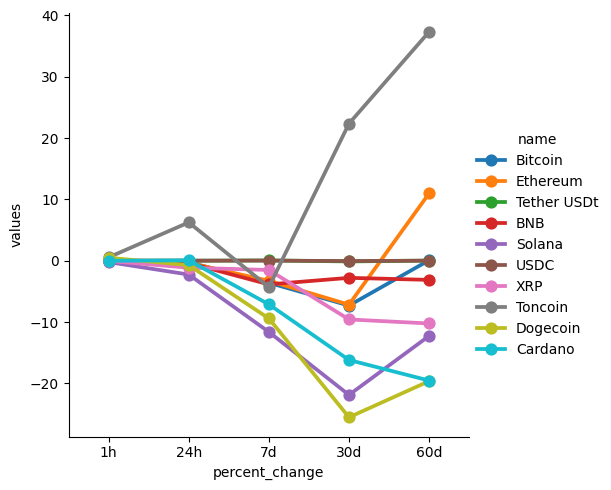

In [25]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [26]:

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,64101.84020,2024-06-23 16:02:13.256191
10,Bitcoin,64101.84020,2024-06-23 16:02:41.849434
20,Bitcoin,64107.61190,2024-06-23 16:03:42.165232


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

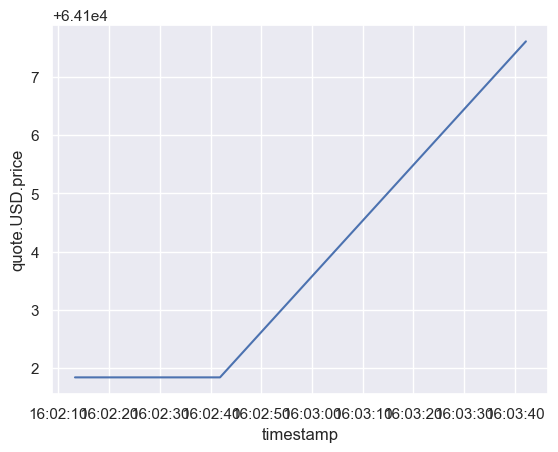

In [27]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)